In [19]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [20]:
type(data)

dict

In [21]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [22]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10494,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.951451e+07,1.951451e+07,False,NaN,1,NaN,NaN,None,2023-10-15T14:37:00.000Z,26904.023055,5.216794e+09,-36.1852,0.021811,0.067962,-3.699811,2.211918,-7.568406,-11.111095,5.250187e+11,49.8546,5.649845e+11,None,2023-10-15T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:38:55.973271
1,1027,Ethereum,ETH,ethereum,7551,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202581e+08,1.202581e+08,True,NaN,2,NaN,NaN,None,2023-10-15T14:37:00.000Z,1555.007129,2.384726e+09,-35.8978,-0.128760,0.290450,-4.713715,-3.873944,-14.710023,-18.750937,1.870023e+11,17.7573,1.870023e+11,None,2023-10-15T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:38:55.973271
2,825,Tether USDt,USDT,tether,63709,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.352701e+10,8.662567e+10,True,NaN,3,NaN,NaN,None,2023-10-15T14:37:00.000Z,1.000208,1.052992e+10,-21.1978,0.009103,0.018390,-0.019422,0.006100,0.144447,-0.006775,8.354438e+10,7.9333,8.664368e+10,None,2023-10-15T14:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-15 16:38:55.973271
3,1839,BNB,BNB,bnb,1682,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538448e+08,1.538448e+08,False,NaN,4,NaN,NaN,None,2023-10-15T14:37:00.000Z,209.008087,3.261842e+08,26.0581,-0.134875,1.275514,-1.245499,-1.214001,-10.411180,-14.235754,3.215481e+10,3.0534,3.215481e+10,None,2023-10-15T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:38:55.973271
4,52,XRP,XRP,xrp,1114,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,None,2023-10-15T14:37:00.000Z,0.486535,3.671042e+08,-23.6951,-0.148607,0.232795,-6.606966,-1.007613,-18.256075,-34.247957,2.600092e+10,2.4690,4.865349e+10,None,2023-10-15T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:38:55.973271
5,3408,USDC,USDC,usd-coin,14451,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.512296e+10,2.512296e+10,False,NaN,6,NaN,NaN,None,2023-10-15T14:37:00.000Z,1.000189,1.040241e+09,-38.7956,0.002492,0.008054,0.033741,0.009315,0.010881,0.010323,2.512771e+10,2.3860,2.512771e+10,None,2023-10-15T14:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-15 16:38:55.973271
6,5426,Solana,SOL,solana,535,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.162580e+08,5.600333e+08,True,NaN,7,NaN,NaN,None,2023-10-15T14:37:00.000Z,21.804841,1.476187e+08,-44.6181,-0.336948,-0.781276,-6.591421,15.588291,-5.958618,-19.783681,9.076440e+09,0.8619,1.221144e+10,None,2023-10-15T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:38:55.973271
7,2010,Cardano,ADA,cardano,946,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.521102e+10,3.625937e+10,False,NaN,8,NaN,NaN,None,2023-10-15T14:37:00.000Z,0.246091,7.356892e+07,-18.0866,-0.108945,-0.370917,-4.228938,-0.777740,-10.193967,-21.736501,8.665105e+09,0.8228,1.107408e+10,None,2023-10-15T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:38:55.973271
8,74,Dogecoin,DOGE,dogecoin,806,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, m

In [24]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['Timestamp'] = pd.to_datetime('now')
    #df= pd.concat([df, df2])


    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'/Users/sahinbasol/API.csv'):
        df.to_csv(r'/Users/sahinbasol/API.csv', header='column_names')
    else: 
        df.to_csv(r'/Users/sahinbasol/API.csv', mode='a', header=False)


    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [25]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [7]:
print(pd. __version__) #append dep.

2.0.3


In [27]:
#to read
df12 = pd.read_csv(r'/Users/sahinbasol/API.csv')
df12

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10494,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.951451e+07,1.951451e+07,False,NaN,1,NaN,NaN,NaN,2023-10-15T14:37:00.000Z,26904.023055,5.216794e+09,-36.1852,0.021811,0.067962,-3.699811,2.211918,-7.568406,-11.111095,5.250187e+11,49.8546,5.649845e+11,NaN,2023-10-15T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:39:10.705820
1,1,1027,Ethereum,ETH,ethereum,7551,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202581e+08,1.202581e+08,True,NaN,2,NaN,NaN,NaN,2023-10-15T14:37:00.000Z,1555.007129,2.384726e+09,-35.8978,-0.128760,0.290450,-4.713715,-3.873944,-14.710023,-18.750937,1.870023e+11,17.7573,1.870023e+11,NaN,2023-10-15T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:39:10.705820
2,2,825,Tether USDt,USDT,tether,63709,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.352701e+10,8.662567e+10,True,NaN,3,NaN,NaN,NaN,2023-10-15T14:37:00.000Z,1.000208,1.052992e+10,-21.1978,0.009103,0.018390,-0.019422,0.006100,0.144447,-0.006775,8.354438e+10,7.9333,8.664368e+10,NaN,2023-10-15T14:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-15 16:39:10.705820
3,3,1839,BNB,BNB,bnb,1682,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538448e+08,1.538448e+08,False,NaN,4,NaN,NaN,NaN,2023-10-15T14:37:00.000Z,209.008087,3.261842e+08,26.0581,-0.134875,1.275514,-1.245499,-1.214001,-10.411180,-14.235754,3.215481e+10,3.0534,3.215481e+10,NaN,2023-10-15T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:39:10.705820
4,4,52,XRP,XRP,xrp,1114,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,NaN,2023-10-15T14:37:00.000Z,0.486535,3.671042e+08,-23.6951,-0.148607,0.232795,-6.606966,-1.007613,-18.256075,-34.247957,2.600092e+10,2.4690,4.865349e+10,NaN,2023-10-15T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:39:10.705820
5,5,3408,USDC,USDC,usd-coin,14451,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.512296e+10,2.512296e+10,False,NaN,6,NaN,NaN,NaN,2023-10-15T14:37:00.000Z,1.000189,1.040241e+09,-38.7956,0.002492,0.008054,0.033741,0.009315,0.010881,0.010323,2.512771e+10,2.3860,2.512771e+10,NaN,2023-10-15T14:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-15 16:39:10.705820
6,6,5426,Solana,SOL,solana,535,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.162580e+08,5.600333e+08,True,NaN,7,NaN,NaN,NaN,2023-10-15T14:37:00.000Z,21.804841,1.476187e+08,-44.6181,-0.336948,-0.781276,-6.591421,15.588291,-5.958618,-19.783681,9.076440e+09,0.8619,1.221144e+10,NaN,2023-10-15T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:39:10.705820
7,7,2010,Cardano,ADA,cardano,946,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.521102e+10,3.625937e+10,False,NaN,8,NaN,NaN,NaN,2023-10-15T14:37:00.000Z,0.246091,7.356892e+07,-18.0866,-0.108945,-0.370917,-4.228938,-0.777740,-10.193967,-21.736501,8.665105e+09,0.8228,1.107408e+10,NaN,2023-10-15T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:39:10.705820
8,8,74,Dogecoin,DOGE,dogecoin,806,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'm

In [62]:
#arrange floats
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [55]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10494,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19514506.00000,19514506.00000,False,NaN,1,NaN,NaN,None,2023-10-15T14:39:00.000Z,26898.25224,5216201614.09141,-36.19280,-0.00111,0.06460,-3.70779,2.27553,-7.56989,-11.14308,524906104743.61414,49.84890,564863297057.89001,None,2023-10-15T14:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:41:11.348578
1,1027,Ethereum,ETH,ethereum,7551,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120258135.50325,120258135.50325,True,NaN,2,NaN,NaN,None,2023-10-15T14:39:00.000Z,1554.46003,2385144321.30715,-35.87790,-0.16355,0.27126,-4.74256,-3.86231,-14.72426,-18.78314,186936465445.06577,17.75280,186936465445.07001,None,2023-10-15T14:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:41:11.348578
2,825,Tether USDt,USDT,tether,63709,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83527007239.14531,86625667477.81340,True,NaN,3,NaN,NaN,None,2023-10-15T14:39:00.000Z,1.00019,10532251126.32223,-21.15910,0.01092,0.00489,-0.02644,0.00477,0.14623,-0.00168,83543233762.42746,7.93320,86642495967.86000,None,2023-10-15T14:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-15 16:41:11.348578
3,1839,BNB,BNB,bnb,1682,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153844824.29324,153844824.29324,False,NaN,4,NaN,NaN,None,2023-10-15T14:39:00.000Z,208.99397,326224847.04907,26.09540,-0.14432,1.25967,-1.26355,-1.21115,-10.40904,-14.24875,32152641103.94991,3.05320,32152641103.95000,None,2023-10-15T14:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:41:11.348578
4,52,XRP,XRP,xrp,1114,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53441027384.00000,99988362642.00000,False,NaN,5,NaN,NaN,None,2023-10-15T14:39:00.000Z,0.48651,367096543.66938,-23.64270,-0.15734,0.22851,-6.61653,-0.99260,-18.26024,-34.25775,25999600368.78067,2.46910,48651011482.17000,None,2023-10-15T14:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:41:11.348578
5,3408,USDC,USDC,usd-coin,14451,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25122964175.03759,25122964175.03759,False,NaN,6,NaN,NaN,None,2023-10-15T14:39:00.000Z,1.00019,1040121281.92510,-38.70320,0.00401,-0.00316,0.02868,-0.00491,0.01332,0.01687,25127662381.72105,2.38670,25127662381.72000,None,2023-10-15T14:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-15 16:41:11.348578
6,5426,Solana,SOL,solana,535,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,416258022.63107,560033261.43190,True,NaN,7,NaN,NaN,None,2023-10-15T14:39:00.000Z,21.79489,148233352.63605,-44.38430,-0.36602,-0.82264,-6.65025,15.55534,-5.98209,-19.81361,9072298672.26457,0.86160,12205864482.80000,None,2023-10-15T14:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-15 16:41:11.348578
7,2010,Cardano,ADA,cardano,946,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35211019209.81200,36259372926.66300,False,NaN,8,NaN,NaN,None,2023-10-15T14:39:00.000Z,0.24608,73607878.40114,-18.04540,-0.11098,-0.37649,-4.25162,-0.76534,-10.20063,-21.75098,8664584426.30486,0.82280,11073417013.59000,None,2023-10-15T14:39:00

In [33]:
#group same coins/tokens

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.00111,0.06460,-3.70779,2.27553,-7.56989,-11.14308
Ethereum,-0.16355,0.27126,-4.74256,-3.86231,-14.72426,-18.78314
Tether USDt,0.01092,0.00489,-0.02644,0.00477,0.14623,-0.00168
BNB,-0.14432,1.25967,-1.26355,-1.21115,-10.40904,-14.24875
XRP,-0.15734,0.22851,-6.61653,-0.99260,-18.26024,-34.25775
USDC,0.00401,-0.00316,0.02868,-0.00491,0.01332,0.01687
Solana,-0.36602,-0.82264,-6.65025,15.55534,-5.98209,-19.81361
Cardano,-0.11098,-0.37649,-4.25162,-0.76534,-10.20063,-21.75098
Dogecoin,0.03473,-0.06711,-3.17788,-3.89287,-14.48913,-15.34142


In [35]:
# we need them as stacks, changes as rows

df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.00111
             quote.USD.percent_change_24h     0.06460
             quote.USD.percent_change_7d     -3.70779
             quote.USD.percent_change_30d     2.27553
             quote.USD.percent_change_60d    -7.56989
             quote.USD.percent_change_90d   -11.14308
Ethereum     quote.USD.percent_change_1h     -0.16355
             quote.USD.percent_change_24h     0.27126
             quote.USD.percent_change_7d     -4.74256
             quote.USD.percent_change_30d    -3.86231
             quote.USD.percent_change_60d   -14.72426
             quote.USD.percent_change_90d   -18.78314
Tether USDt  quote.USD.percent_change_1h      0.01092
             quote.USD.percent_change_24h     0.00489
             quote.USD.percent_change_7d     -0.02644
             quote.USD.percent_change_30d     0.00477
             quote.USD.percent_change_60d     0.14623
             quote.USD.percent_change_90

In [36]:
type(df4)# can no longer treat as series

pandas.core.series.Series

In [37]:
type(df3)

pandas.core.frame.DataFrame

In [38]:
#convert to frame

df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.00111
            quote.USD.percent_change_24h   0.06460
            quote.USD.percent_change_7d   -3.70779
            quote.USD.percent_change_30d   2.27553
            quote.USD.percent_change_60d  -7.56989
            quote.USD.percent_change_90d -11.14308
Ethereum    quote.USD.percent_change_1h   -0.16355
            quote.USD.percent_change_24h   0.27126
            quote.USD.percent_change_7d   -4.74256
            quote.USD.percent_change_30d  -3.86231
            quote.USD.percent_change_60d -14.72426
            quote.USD.percent_change_90d -18.78314
Tether USDt quote.USD.percent_change_1h    0.01092
            quote.USD.percent_change_24h   0.00489
            quote.USD.percent_change_7d   -0.02644
            quote.USD.percent_change_30d   0.00477
            quote.USD.percent_change_60d   0.14623
            quote.USD.percent_change_90d  -0.00168
BNB         quote.USD.percent_change_1h   -0.14432
            quote.USD.percent_change_24h   1.25967
            quote.USD.percent_change_7d   -1.26355
            quote.USD.percent_change_30d  -1.21115
            quote.USD.percent_change_60d -10.40904
            quote.USD.percent_change_90d -14.24875
XRP         quote.USD.percent_change_1h   -0.15734
            quote.USD.percent_change_24h   0.22851
            quote.USD.percent_change_7d   -6.61653
            quote.USD.percent_change_30d  -0.99260
            quote.USD.percent_change_60d -18.26024
            quote.USD.percent_change_90d -34.25775
USDC        quote.USD.percent_change_1h    0.00401
            quote.USD.percent_change_24h  -0.00316
            quote.USD.percent_change_7d    0.02868
            quote.USD.percent_change_30d  -0.00491
            quote.USD.percent_change_60d   0.01332
            quote.USD.percent_change_90d   0.01687
Solana      quote.USD.percent_change_1h   -0.36602
            quote.USD.percent_change_24h  -0.82264
            quote.USD.percent_change_7d   -6.65025
            quote.USD.percent_change_30d  15.55534
            quote.USD.percent_change_60d  -5.98209
            quote.USD.percent_change_90d -19.81361
Cardano     quote.USD.percent_change_1h   -0.11098
            quote.USD.percent_change_24h  -0.37649
            quote.USD.percent_change_7d   -4.25162
            quote.USD.percent_change_30d  -0.76534
            quote.USD.percent_change_60d -10.20063
            quote.USD.percent_change_90d -21.75098
Dogecoin    quote.USD.percent_change_1h    0.03473
            quote.USD.percent_change_24h  -0.06711
            quote.USD.percent_change_7d   -3.17788
            quote.USD.percent_change_30d  -3.89287
            quote.USD.percent_change_60d -14.48913
            quote.USD.percent_change_90d -15.34142
TRON        quote.USD.percent_change_1h    0.07509
            quote.USD.percent_change_24h   0.10526
            quote.USD.percent_change_7d   -2.82215
            quote.USD.percent_change_30d   2.78679
            quote.USD.percent_change_60d  12.91656
            quote.USD.percent_change_90d   7.27921
Toncoin     quote.USD.percent_change_1h   -0.26951
            quote.USD.percent_change_24h  -1.22009
            quote.USD.percent_change_7d   -6.16377
            quote.USD.percent_change_30d  -1.88620
            quote.USD.percent_change_60d  33.49201
            quote.USD.percent_change_90d  42.58642
Dai         quote.USD.percent_change_1h   -0.02507
            quote.USD.percent_change_24h  -0.01670
            quote.USD.percent_change_7d   -0.04236
            quote.USD.percent_change_30d   0.05077
            quote.USD.percent_change_60d   0.01634
            quote.USD.percent_change_90d   0.02694
Polygon     quote.USD.percent_change_1h   -0.07503
            quote.USD.percent_change_24h  -0.54019
            quote.USD.percent_change_7d   -8.31837
            quote.USD.percent_change_30d  -0.44627
            quote.USD.percent_change_60d -17.32697
            quo

In [39]:
type(df5)

pandas.core.frame.DataFrame

In [40]:
#but the name is acting as index, better to create numbers to access, basicly want how many rows we have here

df5.count()

values    90
dtype: int64

In [43]:
#setting the index won't show all but REsetting 
index = pd.Index(range(90))

df6 = df5.set_index(index)
df6

,values
0,-0.00111
1,0.06460
2,-3.70779
3,2.27553
4,-7.56989
5,-11.14308
6,-0.16355
7,0.27126
8,-4.74256
9,-3.86231


In [44]:
#setting the index won't show all but REsetting 
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.00111
1,Bitcoin,quote.USD.percent_change_24h,0.06460
2,Bitcoin,quote.USD.percent_change_7d,-3.70779
3,Bitcoin,quote.USD.percent_change_30d,2.27553
4,Bitcoin,quote.USD.percent_change_60d,-7.56989
5,Bitcoin,quote.USD.percent_change_90d,-11.14308
6,Ethereum,quote.USD.percent_change_1h,-0.16355
7,Ethereum,quote.USD.percent_change_24h,0.27126
8,Ethereum,quote.USD.percent_change_7d,-4.74256
9,Ethereum,quote.USD.percent_change_30d,-3.86231


In [45]:
#rename level_1 column

df7 = df6.rename(columns= {'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.00111
1,Bitcoin,quote.USD.percent_change_24h,0.06460
2,Bitcoin,quote.USD.percent_change_7d,-3.70779
3,Bitcoin,quote.USD.percent_change_30d,2.27553
4,Bitcoin,quote.USD.percent_change_60d,-7.56989
5,Bitcoin,quote.USD.percent_change_90d,-11.14308
6,Ethereum,quote.USD.percent_change_1h,-0.16355
7,Ethereum,quote.USD.percent_change_24h,0.27126
8,Ethereum,quote.USD.percent_change_7d,-4.74256
9,Ethereum,quote.USD.percent_change_30d,-3.86231


In [50]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.00111
1,Bitcoin,24h,0.06460
2,Bitcoin,7d,-3.70779
3,Bitcoin,30d,2.27553
4,Bitcoin,60d,-7.56989
5,Bitcoin,90d,-11.14308
6,Ethereum,1h,-0.16355
7,Ethereum,24h,0.27126
8,Ethereum,7d,-4.74256
9,Ethereum,30d,-3.86231


In [51]:
#Visualizations

import seaborn as sns
import matplotlib.pyplot as plt

/Users/sahinbasol/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


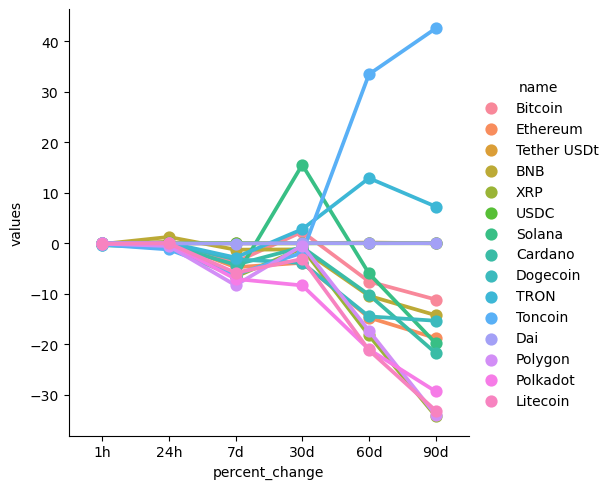

In [52]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [70]:
#take specific columns

df10 = df12[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df10



,name,quote.USD.price,timestamp
0,Bitcoin,26904.02306,2023-10-15 16:39:10.705820
15,Bitcoin,26896.73326,2023-10-15 16:40:11.049718
30,Bitcoin,26898.25224,2023-10-15 16:41:11.348578


In [65]:
df11 = df[['name', 'quote.USD.price', 'timestamp']]
df11 = df11.query("name == 'Bitcoin'")
df11

,name,quote.USD.price,timestamp
0,Bitcoin,26898.25224,2023-10-15 16:41:11.348578


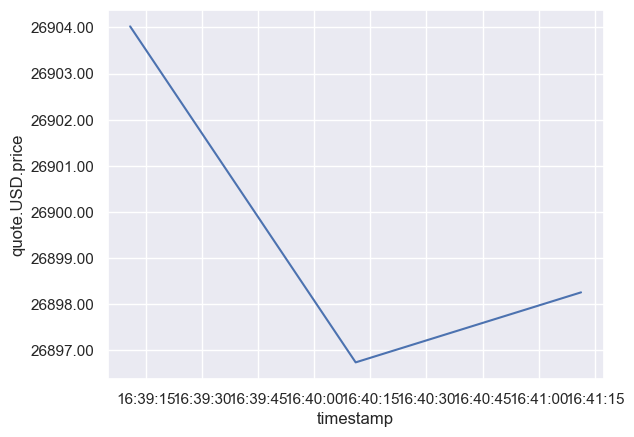

In [77]:
sns.set_theme(style= 'darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data= df10)
plt.gca().yaxis.set_major_formatter('{:.2f}'.format)

# Show the plot
plt.show()

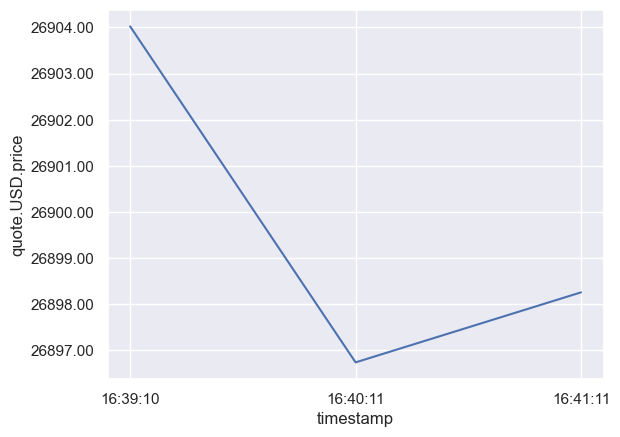

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'timestamp' is a datetime column in your DataFrame
# You may need to convert it to datetime if it's not already
df10['timestamp'] = pd.to_datetime(df10['timestamp'])
plt.gca().yaxis.set_major_formatter('{:.2f}'.format)

# Set the Seaborn theme
sns.set_theme(style='darkgrid')

# Create the lineplot with custom number formatting
sns.lineplot(x=df10['timestamp'].dt.strftime('%H:%M:%S'), y='quote.USD.price', data=df10)

# Format the x-axis tick labels to display only hour:minute:second
#plt.xticks(rotation=45)  # Rotates x-axis labels for better readability

# Show the plot
plt.show()